### Data Cleansing

In some process models Data Cleansing is a separate task, it is closely tied to Feature Creation but also draws findings from the Initial Data Exploration task. The actual data transformations are implemented in the Feature Creation asset deliverable; therefore, Data Cleansing is part of the Feature Creation task in this process model.

While tuning machine learning models, this deliverable asset is touched on a regular basis anyway because features need to be transformed to increase model performance. In such iterations, often issues with data are detected and therefore need to be corrected/addressed here as well.

The following none exhaustive list gives you some guidelines:

- Data types Are data types of columns matching their content? E.g. is age stored as integer and not as string?  

- Ranges Does the value distribution of values in a column make sense? Use stats (e.g. min, max, mean, standard deviation) and visualizations (e.g. box-plot, histogram) for help  

- Emptiness Are all values non-null where mandatory? E.g. client IDs  

- Uniqueness Are duplicates present where undesired? E.g. client IDs  

- Set memberships Are only allowed values chosen for categorical or ordinal fields? E.g. Female, Male, Unknown  

- Foreign key set memberships Are only allowed values chosen as field? E.g. ZIP code  

- Regular expressions Some files need to stick to a pattern expressed by a regular expression. E.g. a lower-case character followed by 6 digits  

- Cross-field validation Some fields can impact validity of other fields. E.g. a male person can’t be pregnant   

Please transform your data set accordingly and add all code to the Feature Creation asset deliverable. Please comply with the naming convention documented in the process model.

### Feature Engineering

Feature Creation and Feature Engineering is one of the most important tasks in machine learning since it hugely impacts model performance. This also holds for deep learning, although to a lesser extent. Features can be changed or new features can be created from existing ones

The following none exhaustive list gives you some guidelines for feature transformation:

- Imputing Some algorithms are very sensitive to missing values. Therefore, imputing allows for filling of empty fields based on its value distribution  

- Imputed time-series quantization Time series often contain streams with measurements at different timestamps. Therefore, it is beneficial to quantize measurements to a common “heart beat” and impute the corresponding values. This can be done by sampling from the source time series distributions on the respective quantized time steps  

- Scaling / Normalizing / Centering Some algorithms are very sensitive differences in value ranges for individual fields. Therefore, it is best practice to center data around zero and scale values to a standard deviation of one  

- Filtering Sometimes imputing values doesn’t perform well, therefore deletion of low quality records is a better strategy  

- Discretizing Continuous fields might confuse the model, e.g. a discrete set of age ranges sometimes performs better than continuous values, especially on smaller amounts of data and with simpler models 

The following none exhaustive list gives you some guidelines for feature creation:

- One-hot-encoding Categorical integer features should be transformed into “one-hot” vectors. In relational terms this results in addition of additional columns – one columns for each distinct category  

- Time-to-Frequency transformation Time-series (and sometimes also sequence data) is recorded in the time domain but can easily transformed into the frequency domain e.g. using FFT (Fast Fourier Transformation)  

- Month-From-Date Creating an additional feature containing the month independent from data captures seasonal aspects. Sometimes further discretization in to quarters helps as well  

- Aggregate-on-Target Simply aggregating fields the target variable (or even other fields) can improve performance, e.g. count number of data points per ZIP code or take the median of all values by geographical region

As feature engineering is an art on itself, this list cannot be exhaustive. It’s not expected to become an expert in this topic at this point. Most of it you’ll learn by practicing data science on real projects and talk to peers which might share their secrets and tricks with you.  

Please transform your data set accordingly and add all code to the Feature Creation asset deliverable. Please comply with the naming convention documented in the process model.

### Milestones Checklist Week 2

- Created an ETL Notebook

- Added Data Cleansing code to the ETL Notebook

- Created a Feature Creation Notebook

- Transformed Features

- Created additional Features

In [1]:
!pip install tensorflow
!pip install python-mnist
!pip install Pillow
!pip install pyspark
!pip install scikit-learn

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210702170125-0000
KERNEL_ID = c9d4ee8f-f0b1-4fb5-a2f2-f089fad693a6
     |████████████████████████████████| 454.3 MB 20 kB/s s eta 0:00:01    |███▎                            | 46.0 MB 10.1 MB/s eta 0:00:41         | 75.9 MB 55.0 MB/s eta 0:00:07��█▍            | 275.2 MB 76.2 MB/s eta 0:00:03�███████████        | 339.4 MB 90.0 MB/s eta 0:00:02
     |████████████████████████████████| 4.0 MB 44.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.4 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 735 kB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 39.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 82.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 83.9 MB/s eta 0:00:01
     |█████████

In [2]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
import seaborn as sns
from mnist import MNIST
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib.image as mping
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from numpy import asarray
import pandas as pd

In [3]:
tf.__version__

'2.5.0'

In [4]:
PIL.__version__

'8.3.0'

## First dataset

#### 60,000 images and 10 classes, each image is 28 x 28 or represented by a 794 element array

In [5]:
# need to download and gunzip each of the train and test images and labels

!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz?raw=True
!mv train-images-idx3-ubyte.gz?raw=True train-images-idx3-ubyte.gz
!gunzip train-images-idx3-ubyte.gz
!ls -lahr train-images-idx3-ubyte

!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz?raw=True
!mv train-labels-idx1-ubyte.gz?raw=True train-labels-idx1-ubyte.gz
!gunzip train-labels-idx1-ubyte.gz
!ls -lahr train-labels-idx1-ubyte

!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz?raw=True
!mv t10k-images-idx3-ubyte.gz?raw=True t10k-images-idx3-ubyte.gz
!gunzip t10k-images-idx3-ubyte.gz
!ls -lahr t10k-images-idx3-ubyte

!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz?raw=True
!mv t10k-labels-idx1-ubyte.gz?raw=True t10k-labels-idx1-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz
!ls -lahr t10k-labels-idx1-ubyte

--2021-07-02 17:05:17--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18165135 (17M)
Saving to: ‘train-images-idx3-ubyte.gz?raw=True’

train-images-idx3-u 100%[===================>]  17.32M  2.24MB/s    in 8.2s    

2021-07-02 17:05:27 (2.11 MB/s) - ‘train-images-idx3-ubyte.gz?raw=True’ saved [18165135/18165135]

-rw-rw-r-- 1 spark spark 45M Feb  4  2019 train-images-idx3-ubyte
--2021-07-02 17:05:30--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29497 (29K)
Saving to: ‘train-labels-idx1-ubyte.gz?raw=True’

train-labels-idx1-u 100

In [6]:
# download the classmap for the first dataset, add the phonetics, and display it
# the classmap shows the classes that each written kuzushiji can be classified into
# and we add the phonetic sound that the characters makes when spoken

url = "http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv"
df_classmap = pd.read_csv(url)
phonetic = ['o','ki','su','tsu','na','ha','ma','ya','re','wo']
df_classmap['phonetic'] = phonetic
df_classmap

,index,codepoint,char,phonetic
0,0,U+304A,お,o
1,1,U+304D,き,ki
2,2,U+3059,す,su
3,3,U+3064,つ,tsu
4,4,U+306A,な,na
5,5,U+306F,は,ha
6,6,U+307E,ま,ma
7,7,U+3084,や,ya
8,8,U+308C,れ,re
9,9,U+3092,を,wo


In [7]:
# create a directory and move these files into it
# then show what is in the directory

!mkdir kmnistdata
!cp t10k-images-idx3-ubyte kmnistdata/t10k-images-idx3-ubyte
!cp t10k-labels-idx1-ubyte kmnistdata/t10k-labels-idx1-ubyte
!cp train-images-idx3-ubyte kmnistdata/train-images-idx3-ubyte
!cp train-labels-idx1-ubyte kmnistdata/train-labels-idx1-ubyte
!ls -al kmnistdata

total 53908
drwxrwxr-x  2 spark spark     4096 Jul  2 17:05 .
drwxr-xr-x 11 spark  2000     4096 Jul  2 17:05 ..
-rw-rw-r--  1 spark spark  7840016 Jul  2 17:05 t10k-images-idx3-ubyte
-rw-rw-r--  1 spark spark    10008 Jul  2 17:05 t10k-labels-idx1-ubyte
-rw-rw-r--  1 spark spark 47040016 Jul  2 17:05 train-images-idx3-ubyte
-rw-rw-r--  1 spark spark    60008 Jul  2 17:05 train-labels-idx1-ubyte


In [8]:
# load the data into arrays

data = MNIST('kmnistdata')
train_images, train_labels = data.load_training()
test_images, test_labels = data.load_testing()

In [9]:
print(train_labels[0])
print(train_images[0])

8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 118, 255, 255, 124, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 238, 255, 146, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 203, 255, 220, 14, 0, 0, 0, 11, 132, 95, 187, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 149, 255, 251, 66, 0, 0, 0, 7, 168, 136, 10, 223, 245, 67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 247, 255, 156, 1, 0, 0, 0, 130, 201, 9, 0, 158, 255, 170, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 212, 255, 226, 22, 0, 0, 0, 79, 240, 38, 0, 0, 143, 255, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 148, 255, 255, 107, 0, 0, 0, 33, 237, 121, 0, 0, 0, 144, 255, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 255, 178, 3, 0, 0, 1, 179, 208, 5, 0, 0, 0, 126, 255, 166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 245, 255, 76, 0, 0, 0, 124, 254, 108, 0, 0, 0, 0, 91, 255, 156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 255, 239, 12, 0, 0, 62, 250, 225, 8, 0, 0, 0, 0, 78, 255, 197, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
type(train_labels)

array.array

In [11]:
type(train_images)

list

In [12]:
# the data needs to be transformed into numpy arrays for use  in the model

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [13]:
type(train_images[0])

numpy.ndarray

In [14]:
type(train_images)

numpy.ndarray

In [15]:
# the train_images are now a numpy array of numbers between 0 and 255
print(train_images[0])

[  0   0   0   0   0   0   0   0   0   0   0 118 255 255 124   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  36 238 255 146   2   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  12 203 255 220  14   0   0
   0  11 132  95 187  95   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 149 255 251  66   0   0   0   7 168 136  10 223 245  67   0
   0   0   0   0   0   0   0   0   0   0   0   0  51 247 255 156   1   0
   0   0 130 201   9   0 158 255 170   0   0   0   0   0   0   0   0   0
   0   0   0  11 212 255 226  22   0   0   0  79 240  38   0   0 143 255
 197   0   0   0   0   0   0   0   0   0   0   0   0 148 255 255 107   0
   0   0  33 237 121   0   0   0 144 255 222   0   0   0   0   0   0   0
   0   0   0   0   0 205 255 178   3   0   0   1 179 208   5   0   0   0
 126 255 166   0   0   0   0   0   0   0   0   0   0   0   7 245 255  76
   0   0   0 124 254 108   0   0   0   0  91 255 15

In [16]:
# Let's further divide the training dataset into validation data.

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=39)

In [17]:
# we need to normalize the numpy arrays so that each number in the numpy
# array is between 0 and 1:

train_images = train_images / 255
val_images = val_images / 255
test_images = test_images / 255

In [18]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.23921569, 0.1372549 , 0.02352941, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01960784, 0.43529412,
       0.79215686, 0.51372549, 0.10196078, 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
# the data as downloaded has two dimensions
# there are 60000 images, each image is represented
# in one dimension as 784 numbers

# (see the notebook kuzushiji.data_exp for displayed images)

train_images.shape

(48000, 784)

In [20]:
val_images.shape

(12000, 784)

In [21]:
test_images.shape

(10000, 784)

## Second dataset

#### 232,365 images, 49 classes, each image is 28 x 28 or represented by a 794 element array

In [22]:
# download the train and test labels and images, 
# which are in .npz format 

!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz?raw=True
!mv k49-train-imgs.npz?raw=True k49-train-imgs.npz
!ls -lahr k49-train-imgs.npz

!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz?raw=True
!mv k49-train-labels.npz?raw=True k49-train-labels.npz
!ls -lahr k49-train-labels.npz

!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz?raw=True
!mv k49-test-imgs.npz?raw=True k49-test-imgs.npz
!ls -lahr k49-test-imgs.npz

!wget http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz?raw=True
!mv k49-test-labels.npz?raw=True k49-test-labels.npz
!ls -lahr k49-test-labels.npz

--2021-07-02 17:05:53--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66117696 (63M)
Saving to: ‘k49-train-imgs.npz?raw=True’

k49-train-imgs.npz? 100%[===================>]  63.05M  2.89MB/s    in 30s     

2021-07-02 17:06:24 (2.12 MB/s) - ‘k49-train-imgs.npz?raw=True’ saved [66117696/66117696]

-rw-rw-r-- 1 spark spark 64M Feb  4  2019 k49-train-imgs.npz
--2021-07-02 17:06:26--  http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164485 (161K)
Saving to: ‘k49-train-labels.npz?raw=True’

k49-train-labels.np 100%[===================>] 160.63K   382KB/s    

In [23]:
# we need to define a load function in order to extract the data
# from the .npz format, and then use  it to extract:

def load(f):
    return np.load(f)['arr_0']

k49_train_images = load('k49-train-imgs.npz')
k49_train_labels = load('k49-train-labels.npz')
k49_test_images = load('k49-test-imgs.npz')
k49_test_labels = load('k49-test-labels.npz')

In [24]:
# next we download the classmap for this dataset
# and add the phonetic, and display it:

url = "http://codh.rois.ac.jp/kmnist/dataset/k49/k49_classmap.csv"
df_k49_classmap = pd.read_csv(url)

k49_phonetic = ['a', 'i',  'u',  'e',  'o',\
                'ka','ki', 'ku', 'ke', 'ko',\
                'sa','shi','su', 'se', 'so',\
                'ta','chi','tsu','te', 'to',\
                'na','ni', 'nu', 'ne', 'no',\
                'ha','hi', 'fu', 'he', 'ho',\
                'ma','mi', 'mu', 'me', 'mo',\
                'ya','yu', 'yo',\
                'ra','ri', 'ru', 're', 'ro',\
                'wa','wi', 'we ','wo', 'n','iteration_mark']
print(len(k49_phonetic))
df_k49_classmap['phonetic'] = k49_phonetic
df_k49_classmap

49


,index,codepoint,char,phonetic
0,0,U+3042,あ,a
1,1,U+3044,い,i
2,2,U+3046,う,u
3,3,U+3048,え,e
4,4,U+304A,お,o
5,5,U+304B,か,ka
6,6,U+304D,き,ki
7,7,U+304F,く,ku
8,8,U+3051,け,ke
9,9,U+3053,こ,ko


In [25]:
# the data is already a numpy array
# since we pulled it out of the .nps formatted structure

type(k49_train_images)

numpy.ndarray

In [26]:
# need to check the dimensionality of the data:

k49_train_images.shape

(232365, 28, 28)

In [27]:
k49_train_labels.shape

(232365,)

In [28]:
k49_test_images.shape

(38547, 28, 28)

In [29]:
# this means we need to flatten the data
# to two dimensions

k49_train_images = np.reshape(k49_train_images, (232365, 784))
k49_test_images = np.reshape(k49_test_images, (38547, 784))

In [30]:
k49_train_images.shape

(232365, 784)

In [31]:
k49_test_images.shape

(38547, 784)

In [32]:
# the k49_train_images are now a numpy array of numbers between 0 and 255
print(k49_train_images[0])

[  0   0   0   0   0   0   0   0   0   0  69 213  39  32 193  52   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  58 235  65   0   0  64 222  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   8 213  59   0   0   0   9 229
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  47 164   0   0   1  37  30 174  90   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  77 132  28  84 172 252
 239 199  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  65 253 248 255 203 132  26 200 123  56  62  38   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 117 150  72
   6   0   0 176 255 255 255 200   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 208 255 250 173  39
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  15 150 246 132  48   1   0   0   0   

In [33]:
# create the validattion set

k49_train_images, k49_val_images, k49_train_labels, k49_val_labels = train_test_split(k49_train_images, k49_train_labels, test_size = 0.2, random_state=35)

In [34]:
# we need to normalize the numpy arrays so that each number in the numpy
# array is between 0 and 1:

k49_train_images = k49_train_images / 255
k49_val_images = k49_val_images /255
k49_test_images = k49_test_images / 255

In [35]:
k49_train_images.shape

(185892, 784)

In [36]:
k49_val_images.shape

(46473, 784)

In [37]:
k49_test_images.shape

(38547, 784)

In [38]:
print(k49_train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00784314 0.07843137 0.00784314
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [39]:
# this is the format we need for the machine learning model

## The Third Dataset 

#### includes Kanji characters, this data has 3832 different classes and consists of 140,426 images, each image is 64 X 64 pixels
#### This dataset is not as processed as the other two.  It is just a bunch of png images in a directory inside an archive file.

In [40]:
# we download the archive:

!wget http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar?raw=True
!mv kkanji.tar?raw=True kkanji.tar
!ls -lahr kkanji.tar

# list the contents of the archive
# limit output to the first 70 files

!tar -tf kkanji.tar | head -70

--2021-07-02 17:06:40--  http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar?raw=True
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324290560 (309M) [application/x-tar]
Saving to: ‘kkanji.tar?raw=True’

kkanji.tar?raw=True 100%[===================>] 309.27M  3.60MB/s    in 1m 46s  

2021-07-02 17:08:26 (2.91 MB/s) - ‘kkanji.tar?raw=True’ saved [324290560/324290560]

-rw-rw-r-- 1 spark spark 310M Dec  8  2018 kkanji.tar
kkanji2/
kkanji2/U+5B87/
kkanji2/U+5B87/72d56fcb33d10fe0.png
kkanji2/U+5B87/75f7923797777c74.png
kkanji2/U+5B87/69d6becd4f8f2d61.png
kkanji2/U+5B87/522dd01c5f9573f5.png
kkanji2/U+5B87/36aadd8d92c64049.png
kkanji2/U+5B87/58f75629e53b9e63.png
kkanji2/U+5B87/557950fbb39b019b.png
kkanji2/U+5B87/c4ca643dbc0299b6.png
kkanji2/U+5B87/02f161e7e7a3c364.png
kkanji2/U+5B87/c45553bb4a35c8d4.png
kkanji2/U+5B87/ffa955bd6cb43af8.png
kk

In [41]:
# extract the archive:
!tar -xf kkanji.tar

# check whats in the current working directory:
!ls -al

total 447984
drwxr-xr-x   12 spark  2000      4096 Jul  2 17:08 .
drwxrwxr-x    1 spark spark      4096 Jul  2 17:00 ..
drwxrwxr-x    4 spark spark      4096 Jul  2 17:04 .cache
drwxrwxr-x    3 spark spark      4096 Jul  2 17:00 conda
drwxrwxr-x    3 spark spark      4096 Jul  2 17:04 .config
drwxr-xr-x    5 spark spark      4096 Jul  2 17:00 .ipython
-rw-rw-r--    1 spark spark  10971201 Feb  4  2019 k49-test-imgs.npz
-rw-rw-r--    1 spark spark     27450 Feb  4  2019 k49-test-labels.npz
-rw-rw-r--    1 spark spark  66117696 Feb  4  2019 k49-train-imgs.npz
-rw-rw-r--    1 spark spark    164485 Feb  4  2019 k49-train-labels.npz
drwxrwxr-x    2 spark spark      4096 Jul  2 17:05 .keras
drwxr-xr-x 3834 spark spark    299008 Dec  8  2018 kkanji2
-rw-rw-r--    1 spark spark 324290560 Dec  8  2018 kkanji.tar
drwxrwxr-x    2 spark spark      4096 Jul  2 17:05 kmnistdata
drwxrwxr-x    2 spark spark      4096 Jul  2 17:01 logs
drwxrwxr-x    2 spark spark      4096 Jul  2 17:00 spark-events
-rw

In [42]:
# check the extracted png files in the newly extracted directory
# List out the first 50 folder names in the directory kkanji2
# the folder names are also the codepoint of each of the characters:

!ls kkanji2 | head -50

U+241C6
U+24FA3
U+25DA1
U+27752
U+29780
U+29DDA
U+29E75
U+4093
U+4453
U+4543
U+4572
U+4C61
U+4C99
U+4E00
U+4E01
U+4E03
U+4E07
U+4E08
U+4E09
U+4E0A
U+4E0B
U+4E0D
U+4E0E
U+4E11
U+4E14
U+4E16
U+4E17
U+4E18
U+4E19
U+4E1E
U+4E21
U+4E26
U+4E2D
U+4E32
U+4E38
U+4E39
U+4E3B
U+4E3C
U+4E42
U+4E43
U+4E45
U+4E4B
U+4E4D
U+4E4E
U+4E4F
U+4E57
U+4E58
U+4E59
U+4E5D
U+4E5E
ls: write error: Broken pipe


In [43]:
# put the codepoints in a file
# let the first line of the file be name
# of the column in the dataframe we are creating
!echo codepoint > codepoints.csv
!ls kkanji2 >> codepoints.csv
!cat codepoints.csv | head -50

codepoint
U+241C6
U+24FA3
U+25DA1
U+27752
U+29780
U+29DDA
U+29E75
U+4093
U+4453
U+4543
U+4572
U+4C61
U+4C99
U+4E00
U+4E01
U+4E03
U+4E07
U+4E08
U+4E09
U+4E0A
U+4E0B
U+4E0D
U+4E0E
U+4E11
U+4E14
U+4E16
U+4E17
U+4E18
U+4E19
U+4E1E
U+4E21
U+4E26
U+4E2D
U+4E32
U+4E38
U+4E39
U+4E3B
U+4E3C
U+4E42
U+4E43
U+4E45
U+4E4B
U+4E4D
U+4E4E
U+4E4F
U+4E57
U+4E58
U+4E59
U+4E5D


In [44]:
# make sure the file codepoints.csv is in the current directory:

!ls -al

total 448016
drwxr-xr-x   12 spark  2000      4096 Jul  2 17:15 .
drwxrwxr-x    1 spark spark      4096 Jul  2 17:00 ..
drwxrwxr-x    4 spark spark      4096 Jul  2 17:04 .cache
-rw-rw-r--    1 spark spark     26841 Jul  2 17:15 codepoints.csv
drwxrwxr-x    3 spark spark      4096 Jul  2 17:00 conda
drwxrwxr-x    3 spark spark      4096 Jul  2 17:04 .config
drwxr-xr-x    5 spark spark      4096 Jul  2 17:00 .ipython
-rw-rw-r--    1 spark spark  10971201 Feb  4  2019 k49-test-imgs.npz
-rw-rw-r--    1 spark spark     27450 Feb  4  2019 k49-test-labels.npz
-rw-rw-r--    1 spark spark  66117696 Feb  4  2019 k49-train-imgs.npz
-rw-rw-r--    1 spark spark    164485 Feb  4  2019 k49-train-labels.npz
drwxrwxr-x    2 spark spark      4096 Jul  2 17:05 .keras
drwxr-xr-x 3834 spark spark    299008 Dec  8  2018 kkanji2
-rw-rw-r--    1 spark spark 324290560 Dec  8  2018 kkanji.tar
drwxrwxr-x    2 spark spark      4096 Jul  2 17:05 kmnistdata
drwxrwxr-x    2 spark spark      4096 Jul  2 17:01 logs
d

In [45]:
# verify the file's path:

print (os.path.abspath("codepoints.csv"))

/home/spark/shared/codepoints.csv


In [46]:
# read all the lines of the file into pandas dataframe
# including the column header which is already in the file
# display new dataframe
# here we can confirm that the data has 3832 classes

df_kanji_classmap = pd.read_csv("codepoints.csv")
df_kanji_classmap

,codepoint
0,U+241C6
1,U+24FA3
2,U+25DA1
3,U+27752
4,U+29780
...,...
3827,U+FA38
3828,U+FA45
3829,U+FA4A
3830,U+FA55


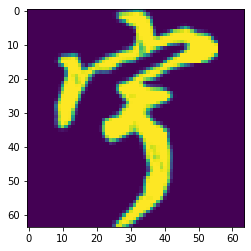

In [47]:
# we'll need to read the images in to transform them
#read the first listed image in the first folder and display it
img = mping.imread('kkanji2/U+5B87/72d56fcb33d10fe0.png')
plt.imshow(img)
plt.show()
# note that this image in only "first" as listed from the tar arcive above
# it is not "first" in terms of the codepoint listing we created directly above

In [48]:
# create a pandas dataframe that contains the codepoint for each image, 
# and its full path in the os and display that dataframe

#  ** reminder:  makes sure to set the path line correctly using the fact that
# the directory kkanji2 is in the same directory as the file codepoints.csv

data = []
dir = os.path.realpath('/home/spark/shared/kkanji2')
for r, d, f in os.walk(dir):
    for file in f:
        if ".png" in file:
            data.append((r.split('/')[-1],os.path.join(r,file)))
df_kanji2 = pd.DataFrame(data, columns=['codepoint', 'image_file_path']).sort_values(by=['codepoint'], ignore_index = True)

In [49]:
# display the new dataframe
# we will change the display width of the pandas 
# dataframe to be able to see the entire path

pd.set_option('max_colwidth', 1000)
df_kanji2

,codepoint,image_file_path
0,U+241C6,/home/spark/shared/kkanji2/U+241C6/c0d603c6ce4a4538.png
1,U+241C6,/home/spark/shared/kkanji2/U+241C6/689fa55040ec4f03.png
2,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/4190e728bfc948e0.png
3,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/80582798ed70ce7c.png
4,U+25DA1,/home/spark/shared/kkanji2/U+25DA1/512d7fcacddd25fd.png
...,...,...
140419,U+FA55,/home/spark/shared/kkanji2/U+FA55/f03dee341d017a83.png
140420,U+FA55,/home/spark/shared/kkanji2/U+FA55/9bb329908332c929.png
140421,U+FA55,/home/spark/shared/kkanji2/U+FA55/9158bbb254b2ec88.png
140422,U+FA5C,/home/spark/shared/kkanji2/U+FA5C/15e2060396eba2b3.png


In [50]:
# show the os path of the first image in the first folder
# as listed in the dataframe
# note that the dataframe list the images grouped by their codepoints
# and the codepoints are sorted by their ASCII values

df_kanji2['image_file_path'][0]

'/home/spark/shared/kkanji2/U+241C6/c0d603c6ce4a4538.png'

In [51]:
# read the image using Pillow and show some information about it:

pimage = Image.open(df_kanji2['image_file_path'][0])
print(pimage.format)
print(pimage.size)
print(pimage.mode)

PNG
(64, 64)
L


float32


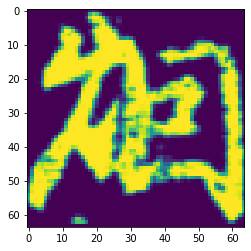

In [52]:
# read the image using matplotlib and show it
img = image.imread(df_kanji2['image_file_path'][0])
print(img.dtype)
plt.imshow(img)

In [53]:
# convert to a numpy array and verify we created a numpy array and it's shape
img_nparray = asarray(img)
print(type(img_nparray))
print(img_nparray.shape)

<class 'numpy.ndarray'>
(64, 64)


In [54]:
# show the values of the array
# notice the array is already normalized
img_nparray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6156863 , 0.07058824,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0627451 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [55]:
img_nparray.shape

(64, 64)

In [56]:
# add a blank column to the dataframe with column name 'np_array'

df_kanji2['np_array'] = ""
df_kanji2

,codepoint,image_file_path,np_array
0,U+241C6,/home/spark/shared/kkanji2/U+241C6/c0d603c6ce4a4538.png,
1,U+241C6,/home/spark/shared/kkanji2/U+241C6/689fa55040ec4f03.png,
2,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/4190e728bfc948e0.png,
3,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/80582798ed70ce7c.png,
4,U+25DA1,/home/spark/shared/kkanji2/U+25DA1/512d7fcacddd25fd.png,
...,...,...,...
140419,U+FA55,/home/spark/shared/kkanji2/U+FA55/f03dee341d017a83.png,
140420,U+FA55,/home/spark/shared/kkanji2/U+FA55/9bb329908332c929.png,
140421,U+FA55,/home/spark/shared/kkanji2/U+FA55/9158bbb254b2ec88.png,
140422,U+FA5C,/home/spark/shared/kkanji2/U+FA5C/15e2060396eba2b3.png,


In [57]:
# fire up the spark session (this cell commented since spark server)
#sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

#spark = SparkSession \
#    .builder \
#    .getOrCreate()

In [58]:
# enable arrow which lets us transfrom a pandas dataframe into a pyspark dataframe
spark.conf.set("spark.sql.execution.arrow.enabled","true")

In [59]:
# convert the pandas dataframe into a pyspark dataframe
df_kanji2_pyspk = spark.createDataFrame(df_kanji2)

In [60]:
# our data has 3,831 different classes each with unique string names
# which is based on their character codepoints
# but we want simple numeric class index
# so we instantiate a StringIndexer in spark:

indexer = StringIndexer(inputCol="codepoint",outputCol="classIndex")
indexed_df = indexer.fit(df_kanji2_pyspk).transform(df_kanji2_pyspk)
indexed_df.show()

+---------+--------------------+--------+----------+
|codepoint|     image_file_path|np_array|classIndex|
+---------+--------------------+--------+----------+
|  U+241C6|/home/spark/share...|        |    2606.0|
|  U+241C6|/home/spark/share...|        |    2606.0|
|  U+24FA3|/home/spark/share...|        |    2607.0|
|  U+24FA3|/home/spark/share...|        |    2607.0|
|  U+25DA1|/home/spark/share...|        |    3017.0|
|  U+27752|/home/spark/share...|        |    1966.0|
|  U+27752|/home/spark/share...|        |    1966.0|
|  U+27752|/home/spark/share...|        |    1966.0|
|  U+27752|/home/spark/share...|        |    1966.0|
|  U+27752|/home/spark/share...|        |    1966.0|
|  U+29780|/home/spark/share...|        |    3018.0|
|  U+29DDA|/home/spark/share...|        |    3019.0|
|  U+29E75|/home/spark/share...|        |    3020.0|
|   U+4093|/home/spark/share...|        |    3021.0|
|   U+4453|/home/spark/share...|        |     680.0|
|   U+4453|/home/spark/share...|        |     

In [61]:
# transform back to pandas dataframe:
df_kanji2 = indexed_df.toPandas()
df_kanji2

,codepoint,image_file_path,np_array,classIndex
0,U+241C6,/home/spark/shared/kkanji2/U+241C6/c0d603c6ce4a4538.png,,2606.0
1,U+241C6,/home/spark/shared/kkanji2/U+241C6/689fa55040ec4f03.png,,2606.0
2,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/4190e728bfc948e0.png,,2607.0
3,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/80582798ed70ce7c.png,,2607.0
4,U+25DA1,/home/spark/shared/kkanji2/U+25DA1/512d7fcacddd25fd.png,,3017.0
...,...,...,...,...
140419,U+FA55,/home/spark/shared/kkanji2/U+FA55/f03dee341d017a83.png,,1041.0
140420,U+FA55,/home/spark/shared/kkanji2/U+FA55/9bb329908332c929.png,,1041.0
140421,U+FA55,/home/spark/shared/kkanji2/U+FA55/9158bbb254b2ec88.png,,1041.0
140422,U+FA5C,/home/spark/shared/kkanji2/U+FA5C/15e2060396eba2b3.png,,3016.0


In [62]:
# add a column containing and numpy array of the image indicated in the path in image_file_path
# and at the same time, flatten each image from a 64 x 64 numpy array to a single
# dimension 4096 element long numpy array, and normalize it
df_kanji2['np_array'] = df_kanji2['image_file_path'].apply(lambda x: np.asarray(Image.open(x))).apply(lambda y: np.reshape(y,(4096,)))

In [63]:
df_kanji2

,codepoint,image_file_path,np_array,classIndex
0,U+241C6,/home/spark/shared/kkanji2/U+241C6/c0d603c6ce4a4538.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 21, 32, 24, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 163, 206, 185, 104, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",2606.0
1,U+241C6,/home/spark/shared/kkanji2/U+241C6/689fa55040ec4f03.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",2606.0
2,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/4190e728bfc948e0.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",2607.0
3,U+24FA3,/home/spark/shared/kkanji2/U+24FA3/80582798ed70ce7c.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 56, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",2607.0
4,U+25DA1,/home/spark/shared/kkanji2/U+25DA1/512d7fcacddd25fd.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, ...]",3017.0
...,...,...,...,...
140419,U+FA55,/home/spark/shared/kkanji2/U+FA55/f03dee341d017a83.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 90, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 172, 182, 49, 0, 0, 0, 1, 24, 25, 0, 0, 0, 0, 0, 0, ...]",1041.0
140420,U+FA55,/home/spark/shared/kkanji2/U+FA55/9bb329908332c929.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 2, 4, 19, 9, 0, 11, 25, 20, 18, 39, 60, 40, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 175, 236, 255, 255, 255, 255, 255, 255, 255, 255, 255, 221, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 132, 154, 140, 188, 215, 203, 201, 230, 239, 205, 132, 58, 21, 2, 0, 0, 0, 0, 0, 0, ...]",1041.0
140421,U+FA55,/home/spark/shared/kkanji2/U+FA55/9158bbb254b2ec88.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 59, 110, 72, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 91, 188, 234, 248, 242, 176, 25, 0, 0, 0, 0, ...]",1041.0
140422,U+FA5C,/home/spark/shared/kkanji2/U+FA5C/15e2060396eba2b3.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 65, 151, 187, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",3016.0


In [64]:
df_kanji2["np_array"][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [65]:
type(df_kanji2["np_array"][0])

numpy.ndarray

In [66]:
print(df_kanji2["np_array"][0])

[0 0 0 ... 0 0 0]


In [67]:
np.set_printoptions(threshold=np.inf)
print(df_kanji2["np_array"][0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
  21  32  24   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12 163 206 185 104  17   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  40 223 255 255 240 173  58  14   3  19  16   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  12 140 231 242 249 239 113
  22   1  39  31   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [68]:
df_kanji2["np_array"][0].size

4096

In [69]:
type(df_kanji2["np_array"][0])

numpy.ndarray

In [70]:
df_kanji2['np_array'].shape

(140424,)

In [71]:
df_kanji2['np_array'][0].shape

(4096,)

In [72]:
images_kanji = df_kanji2["np_array"].to_numpy()

In [73]:
labels_kanji = df_kanji2["classIndex"].to_numpy()

In [74]:
images_kanji.shape

(140424,)

In [75]:
images_kanji[0].shape

(4096,)

In [76]:
print(images_kanji.shape)

(140424,)


In [77]:
type(images_kanji)

numpy.ndarray

In [78]:
type(images_kanji[0])

numpy.ndarray

In [79]:
images_kanji = np.stack(images_kanji)

In [80]:
images_kanji.shape

(140424, 4096)

In [81]:
labels_kanji.shape

(140424,)

In [82]:
x_train_kanji, x_test_kanji, y_train_kanji, y_test_kanji = train_test_split(images_kanji, labels_kanji, test_size = 0.2, random_state=42)
x_train_kanji, x_val_kanji, y_train_kanji, y_val_kanji = train_test_split(x_train_kanji, y_train_kanji, test_size = 0.2, random_state=42)

In [83]:
x_train_kanji.shape

(89871, 4096)

In [84]:
x_test_kanji.shape

(28085, 4096)

In [85]:
x_val_kanji.shape

(22468, 4096)

In [86]:
print(x_train_kanji[0])

[  0   0   0   0   0   0  17  55  11   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   2  93 158 148 103  85  60  77 131 140
 130 103  86  24   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
  39 189 245 242 226 224 207 212 244 244 239 219 219 121  20   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  38 106
 121 110  91  68  34  25  26  37  59  85 133 249 255 255 255 254 216 194
 241 246 230 236 222 109  19   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1  61 187 247 255 251 234 223 204 189 183 177
 192 206 225 255 255 255 255 246 154 138 213 185 13

In [ ]:
# since normalization is computationally intensive, we leave it until the training step
# which has more compute resources